In [1]:
from pathlib import Path

import skimage
from skimage import io
from skimage.transform import resize
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.filters import unsharp_mask
%matplotlib inline

In [2]:
def unsharpmask_amount(fileID, band):
    fires = io.imread(fileID);
    firstChannel = np.squeeze(fires[:,:,0])
    firstChannel = (1.0/255.0)*firstChannel
    height, width = firstChannel.shape
    smallFires = resize(firstChannel, (round(height/2), round(width/2)))
    blurryFires = resize(smallFires, (height, width))
    details = firstChannel - blurryFires
    image = blurryFires
    #image = (1.0/255.0)*image
    
    table = []
    a = 1
    while a <= 2:
        result_1 = unsharp_mask(image, radius=1, amount=a)
        abs_error = abs(firstChannel-result_1)*255
        mean = abs_error.mean()
        table.append({'Filename': fileID,'Band': band,'Amount': a, 'Mean Error': mean})
        a = a + .1
    
    return pd.DataFrame(table)

In [3]:
#     fires = io.imread('TIFF_Files/Camp_Fire/GOES-17_ABI_RadC_C07_20181115_170218_cali.tif');
#     firstChannel = np.squeeze(fires[:,:,0])
#     firstChannel = (1.0/255.0)*firstChannel
#     height, width = firstChannel.shape
#     smallFires = resize(firstChannel, (round(height/2), round(width/2)))
#     blurryFires = resize(smallFires, (height, width))
#     details = firstChannel - blurryFires
#     image = blurryFires
#     #image = (1.0/255.0)*image
    
#     firstChannel.min(),firstChannel.max()
#     smallFires.min(),smallFires.max()
#     blurryFires.min(),blurryFires.max()
#     image.min(),image.max()

In [4]:
unsharpmask_amount('TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181115_170218_cali.tif','07')

,Filename,Band,Amount,Mean Error
0,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,1.0,1.151756
1,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,1.1,1.140994
2,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,1.2,1.132431
3,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,1.3,1.126067
4,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,1.4,1.121904
5,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,1.5,1.119908
6,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,1.6,1.120098
7,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,1.7,1.122434
8,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,1.8,1.126914
9,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,1.9,1.133447


In [5]:
# creates a table out of all the c14 files
dfc14 = pd.concat((unsharpmask_amount(file, '14') for file in Path('TIFF_Files/CampFire/').glob('GOES-17_ABI_RadC_C14*')))

In [6]:
#creates a table out of all the c07 files
dfc07 = pd.concat((unsharpmask_amount(file, '07') for file in Path('TIFF_Files/CampFire/').glob('GOES-17_ABI_RadC_C07*')))

In [7]:
df_all = pd.concat([dfc14, dfc07])

In [8]:
df_all

,Filename,Band,Amount,Mean Error
0,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,1.0,1.295991
1,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,1.1,1.285566
2,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,1.2,1.277669
3,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,1.3,1.272198
4,TIFF_Files/CampFire/GOES-17_ABI_RadC_C14_20181...,14,1.4,1.269216
...,...,...,...,...
5,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,1.5,1.017040
6,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,1.6,1.016703
7,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,1.7,1.018233
8,TIFF_Files/CampFire/GOES-17_ABI_RadC_C07_20181...,07,1.8,1.021580


In [9]:
df = df_all
df.groupby(['Band', 'Amount']).mean().reset_index()

,Band,Amount,Mean Error
0,07,1.0,1.110291
1,07,1.1,1.100285
2,07,1.2,1.092296
3,07,1.3,1.086352
4,07,1.4,1.082453
5,07,1.5,1.080610
6,07,1.6,1.080804
7,07,1.7,1.083004
8,07,1.8,1.087172
9,07,1.9,1.093253


In [10]:
df7 = (df[df["Band"]=="07"])
df14 = df[df["Band"]=="14"]

Text(0.5, 0, 'Amount')

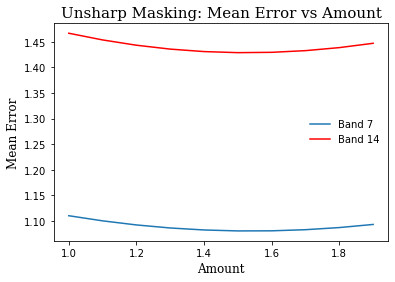

In [11]:
ax = df7.groupby(['Amount']).mean().reset_index().plot('Amount','Mean Error')
df14.groupby(['Amount']).mean().reset_index().plot('Amount','Mean Error',color = 'red',ax = ax)
plt.legend(['Band 7','Band 14'],frameon = False)
plt.rc('font',family='serif')
plt.title('Unsharp Masking: Mean Error vs Amount',fontname = 'serif',fontsize = 15)
plt.ylabel('Mean Error',fontname = 'serif',fontsize = 12)
plt.xlabel('Amount',fontname = 'serif',fontsize = 12)